In [2]:
import obspy, glob
import numpy as np
from obspy import Trace, UTCDateTime
from scipy.io.wavfile import read, write
import matplotlib.pyplot as plt
# import h5py
import matplotlib.dates as mdates
from matplotlib import cm
from datetime import datetime, date, timedelta
from scipy import signal
import numpy.matlib

In [3]:
def calib(data, S):
    return data / ((10)**(S/20)) * (10**(-6))

In [23]:
path = '../Results/sound'
file = f'{path}/Keelung_fish_chorus_061922109_downsampling_lp.wav'

S = -176.2 # end to end 

In [24]:
rate, data = read(file)
data = calib(data, S)

strtime = file.rsplit('.')[1]
mm = strtime[2:4]
dd = strtime[4:6]
hh = strtime[6:8]
print(mm,dd,hh)

In [25]:


rate, data = read(file)
# data = calib(data, S)
tr = Trace()
tr.data = data
tr.stats.sampling_rate = rate

(-1.2, 1.2)

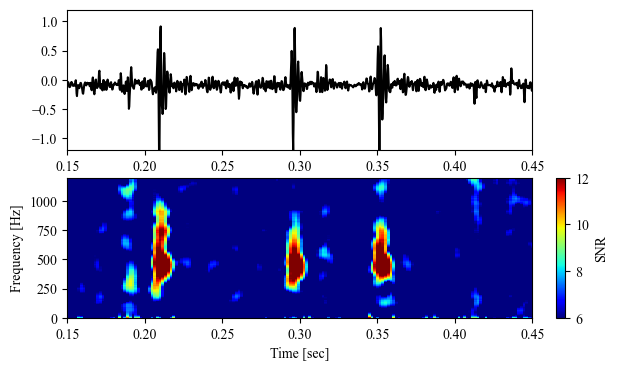

In [31]:
length = 256/4
f,t,P = signal.stft(tr.data, fs= tr.stats.sampling_rate, window='hann', 
                          nperseg=length, noverlap=int(0.9*length), nfft=4000, detrend='constant', boundary=None, padded=False)
data = 10*np.log10(np.abs(P)/np.power(1, 2)) + 176.2

axis=1
ambient = np.percentile(data, 20, axis=axis)
if axis==0:
    input_data = np.subtract(data, np.matlib.repmat(ambient, data.shape[axis], 1))
elif axis==1:
    input_data = np.subtract(data, np.matlib.repmat(ambient, data.shape[axis], 1).T)

#============= plot
#============= plot
#============= plot


# xmin = tr_cut.times()[0]; xmax = tr_cut.times()[-1]
xmin = 0.15; xmax =0.45
ylim = 1.2

fig, ax = plt.subplots(2,1, figsize=(6, 4))
plt.rcParams["font.family"] = "Times New Roman"   
im1 = ax[1].imshow(input_data, vmin=6, vmax=12,
           origin='lower',  aspect='auto', cmap=cm.jet,
           extent=[t[0], t[-1], f[0], f[-1]], interpolation='none')
ax[1].set_ylabel('Frequency [Hz]')
ax[1].set_xlabel('Time [sec]')
ax[1].set_ylim(0, 1200)
ax[1].set_xlim(xmin,xmax)
rect = [0.94, 0.11, 0.015, 0.35]
cbar_ax = fig.add_axes(rect)
plt.colorbar(im1, cax=cbar_ax, label = 'SNR')

ax[0].plot(tr.times(), tr.data/ max(tr.data), 'k')
ax[0].set_xlim(xmin,xmax)
ax[0].set_ylim(-1*ylim, ylim)

# ax[0].set_title(f'{mm}/{dd}T{hh}:{begin_min}:{begin_sec}')

In [11]:
tr_time

2023-04-18T20:06:08.000000Z